<a href="https://colab.research.google.com/github/ignaciomorenobarria21-a11y/Mi_primer_repo/blob/main/Copia_de_Sesi%C3%B3n10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo ARMA

* Leer datos `retornos.csv`
* Usamos PACF y ACF para decidir qué ordenes p, q de modelo ARMA vamos a usar
* Separamos nuestros datos en train/test inicial
* *Rolling forecast*: para cada día, ajustamos un modelo ARMA con los datos hasta el momento, y lanzamos una predicción para el día siguiente
* Comparamos las predicciones sobre los datos de test

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('retornos.csv')

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt


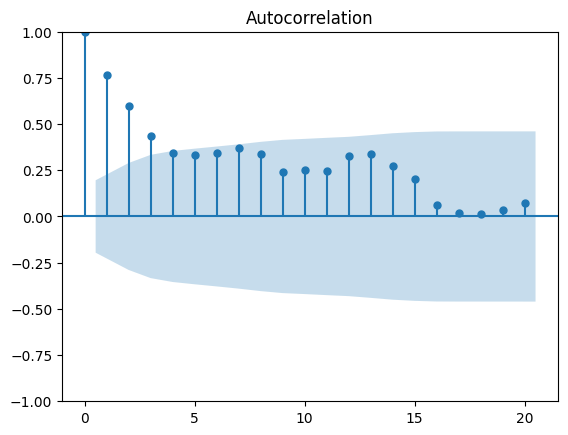

In [ ]:
plot_acf(df)
plt.show()

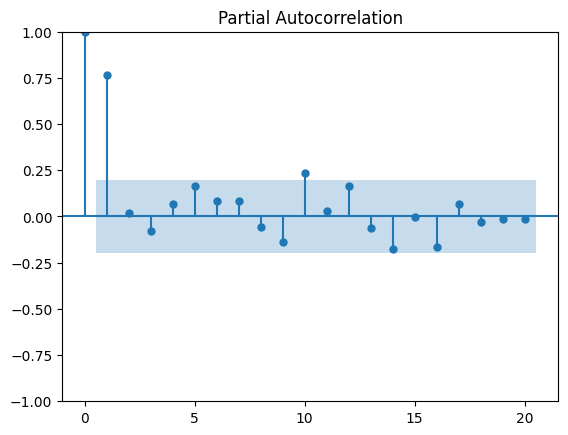

In [ ]:
plot_pacf(df)
plt.show()

In [ ]:
# Basándonos en pacf, acf esogemos valores para los órdenes del modelo ARMA
ar_order = 1
ma_order = 3

In [ ]:
# Split train/test
X = df.values
split_index = int(len(df)*0.8)
train_data = X[:split_index]
test_data = X[split_index:]

In [ ]:
len(train_data), len(test_data)

(80, 20)

In [ ]:
ma_order

3

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

predictions_rolling = []

history = list(train_data)

# Walk-forward validation
for t in range(len(test_data)):
    # Fit MA model with MA order to the history
    model = ARIMA(history, order=(ar_order, 0, ma_order))
    model_fit = model.fit()

    # Predict the next step
    yhat = model_fit.predict(start=len(history), end=len(history))

    # Append prediction to list
    predictions_rolling.append(yhat[0])

    # Append actual value from test data to history
    history.append(test_data[t])

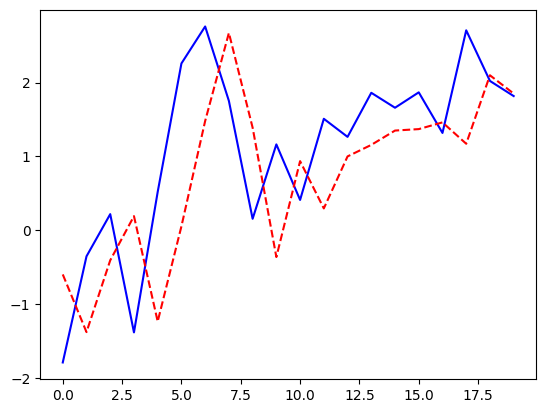

In [ ]:
plt.plot(test_data, color='blue')
plt.plot(predictions_rolling, color='red', linestyle = '--')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions_rolling)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1.234176179676809


## Modularizando el código

* Una función `split_data` que toma como input un dataframe con una serie temporal, y devuelve train_data, test_data.
* Un función `predictions_rolling_arma` que toma como inputs train_data, test_data, ar_order, ma_order y devuelve las predicciones predictions_rolling

In [ ]:
def split_data(df):
  # Split train/test
  X = df.values
  split_index = int(len(df)*0.8)
  train_data = X[:split_index]
  test_data = X[split_index:]
  return train_data, test_data

def predictions_rolling_arma(train_data, test_data, ar_order, ma_order):
  from statsmodels.tsa.arima.model import ARIMA

  predictions_rolling = []

  history = list(train_data)

  # Walk-forward validation
  for t in range(len(test_data)):
      # Fit MA model with MA order to the history
      model = ARIMA(history, order=(ar_order, 0, ma_order))
      model_fit = model.fit()

      # Predict the next step
      yhat = model_fit.predict(start=len(history), end=len(history))

      # Append prediction to list
      predictions_rolling.append(yhat[0])

      # Append actual value from test data to history
      history.append(test_data[t])

  return predictions_rolling

In [ ]:
train_data, test_data = split_data(df)
ar_order, ma_order = 1, 1
predictions_rolling = predictions_rolling_arma(train_data, test_data, ar_order, ma_order)

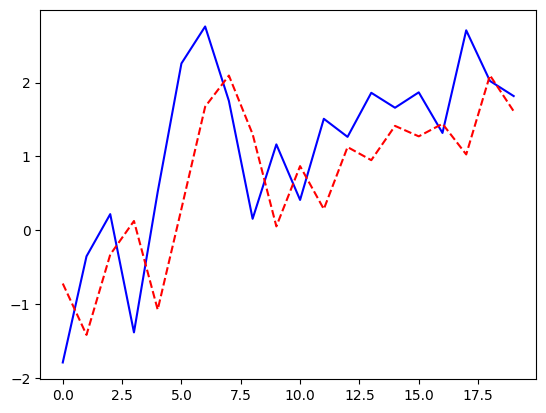

In [ ]:
plt.plot(test_data, color='blue')
plt.plot(predictions_rolling, color='red', linestyle = '--')
plt.show()

## Ejercicio 1 🧩
* Importar `ventas_mensuales.csv` y plotear la ST
* Plotea ACF & PACF
* Propón ódenes p, q para un modelo ARMA
* Ajusta tu modelo sobre los datos, y haz predicciones usando un rolling forecast partiendo de una train/test split del 80%/20%
* Escoje algunos otros órdenes y observa si mejora tu modelo usando *MSE* (Mean Square Error)

* [Opcional] Usando todos tu datos para ajustar el modelo, cuál es la venta predicha para el siguiente periodo que no aparece en el dataset?

In [ ]:
ventas = pd.read_csv('ventas_mensuales.csv')

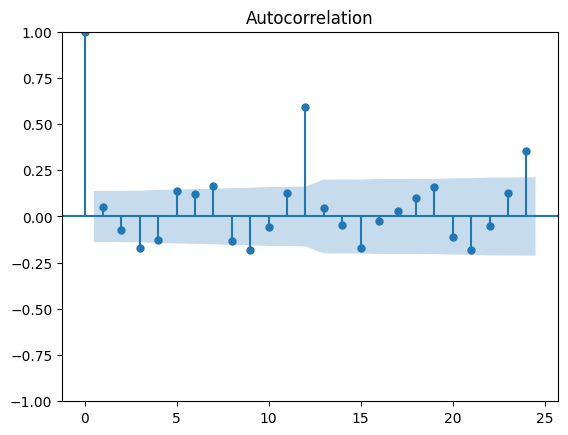

In [ ]:
plot_acf(ventas)
plt.show()

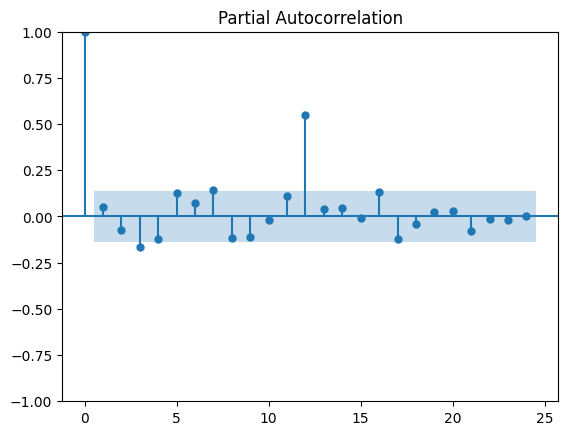

In [ ]:
plot_pacf(ventas)
plt.show()

### Opción 1: ar_order, ma_order = 12, 0

In [ ]:
ar_order, ma_order = 12, 0

In [ ]:
train_data, test_data = split_data(ventas)
predictions_rolling = predictions_rolling_arma(train_data, test_data, ar_order, ma_order)

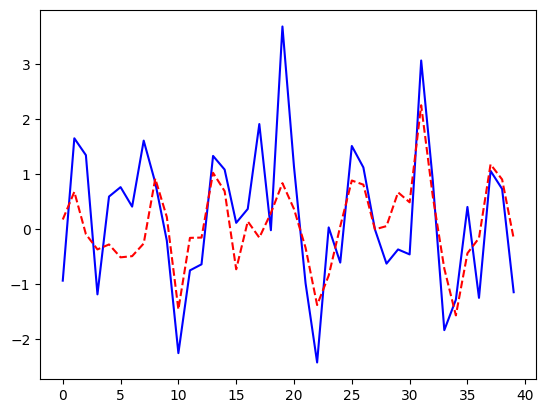

In [ ]:
# Plot forecast vs real data
plt.plot(test_data, color='blue')
plt.plot(predictions_rolling, color='red', linestyle = '--')
plt.show()

In [ ]:
mse = mean_squared_error(test_data, predictions_rolling)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.9430143343192416


#### Opción 2: ar_order, ma_order = 12, 3

In [ ]:
train_data, test_data = split_data(ventas)
ar_order, ma_order = 12, 3
predictions_rolling = predictions_rolling_arma(train_data, test_data, ar_order, ma_order)

Mean Squared Error (MSE): 0.9856601345967405


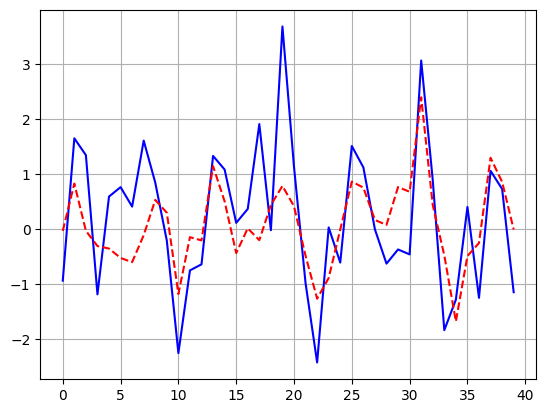

In [ ]:
# Plot
plt.plot(test_data, color = 'blue')
plt.plot(predictions_rolling, color = 'red', linestyle='--')
plt.grid(True)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions_rolling)
print(f'Mean Squared Error (MSE): {mse}')

In [ ]:
# Usa todos tus datos para crear la seguiente predicción
model = ARIMA(ventas, order=(1, 0, 0))
model_fit = model.fit()
model_fit.forecast()

,0
200,-0.191539


In [ ]:
ventas.tail()

,Ventas
195,0.405621
196,-1.247512
197,1.062243
198,0.732851
199,-1.144611


In [ ]:
model_fit.predict(start=200, end=200)

,0
200,-0.191539


## Ejercicio 2 🧩
Importa cotizaciones de Apple:



```
import yfinance as yf

# Get Apple stock data
prices = yf.download("AAPL", start="2021-01-01", end="2021-05-31")["Close"]
```

* Plotear la ST
* Plotea ACF & PACF
* Propón ódenes p, q para un modelo ARMA (puede ser sólo AR, MA)
* Ajusta tu modelo sobre los datos, y haz predicciones usando un rolling forecast partiendo de una train/test split del 80%/20%
* Qué proporción de veces acertó respecto a si el retorno al día siguiente sería positivo o negativo? Mejoró la elección al azar?

In [ ]:
import yfinance as yf

prices = yf.download("AAPL", start="2021-01-01", end="2021-05-31")["Close"]

/tmp/ipython-input-1553752807.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download("AAPL", start="2021-01-01", end="2021-05-31")["Close"]
[*********************100%***********************]  1 of 1 completed


In [ ]:
returns = prices.pct_change().dropna()

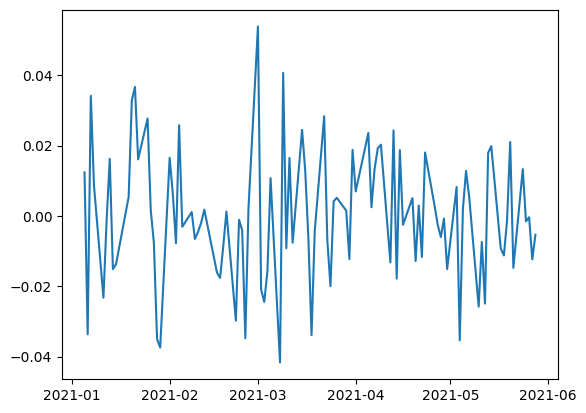

In [ ]:
plt.plot(returns)

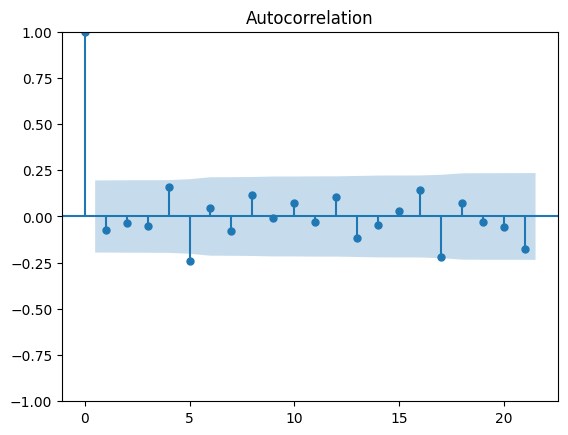

In [ ]:
plot_acf(returns)
plt.show()

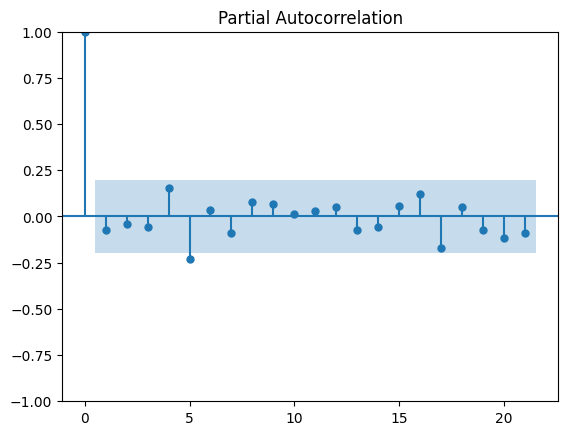

In [ ]:
plot_pacf(returns)
plt.show()

In [ ]:
ar_order, ma_order = 5, 5

In [ ]:
train_data, test_data = split_data(returns)
predictions_rolling = predictions_rolling_arma(train_data, test_data, ar_order, ma_order)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


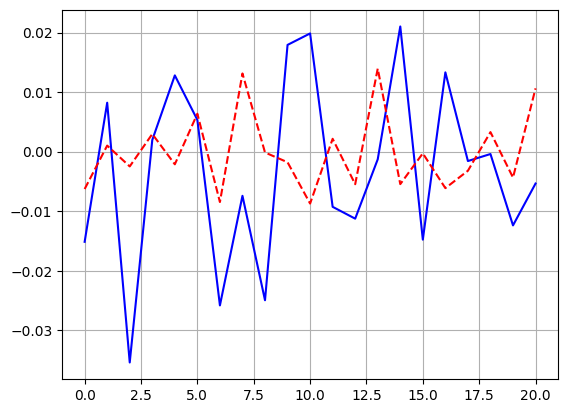

In [ ]:
# Plot
plt.plot(test_data, color = 'blue')
plt.plot(predictions_rolling, color = 'red', linestyle='--')
plt.grid(True)

In [ ]:
import numpy as np

np.mean(np.sign(test_data) == np.sign(predictions_rolling))

np.float64(0.528344671201814)

In [ ]:
np.mean(returns)

np.float64(-0.00017228111223011595)

## YouTube video

* ¿Cómo se podría usar ARMA para crear una estrategia de inversión?
* ¿Podemos mejorar métodos baseline como random buying o comprar cuando subió el día anterior?
[Ver vídeo](https://www.youtube.com/watch?v=Vyr5dthe-2s&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=19)